In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
LEASE = 3000
get_timestamp = lambda time_str: datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S').timestamp()

# Completed Chameleon Lease

In [6]:
completed_lease = pd.read_csv('leases.csv')
start_time = completed_lease[completed_lease['completed']==0]['Time'].iloc[0]
end_time = completed_lease[completed_lease['completed']==LEASE]['Time'].iloc[0]
start_time, end_time

('2021-07-29 15:26:45', '2021-07-29 15:41:15')

# OSG Job Execution Cost

In [8]:
base_osg_jobs = pd.read_csv('osg_jobs.csv')
base_osg_jobs = base_osg_jobs.dropna()
base_osg_jobs = base_osg_jobs[base_osg_jobs['action'] == 'stop']
base_osg_jobs = base_osg_jobs[base_osg_jobs['JobSimCompleteDate'] < get_timestamp(end_time)]
del base_osg_jobs['_id']
base_osg_jobs = base_osg_jobs[(base_osg_jobs['TotalCost'] > 0) & (base_osg_jobs['WastedCost'] >= 0)]

In [9]:
base_osg_jobs.shape

(42933, 27)

In [10]:
base_osg_jobs['ResubmitCount'].value_counts()

0    37763
1     4445
2      612
3       96
4       16
5        1
Name: ResubmitCount, dtype: int64

In [11]:
base_osg_jobs[['TotalCost', 'WastedCost']].describe()

,TotalCost,WastedCost
count,42933.000000,42933.000000
mean,8.006380,0.470069
std,3.313110,2.257719
min,0.003722,0.000000
25%,6.325947,0.000000
50%,7.710703,0.000000
75%,9.300188,0.000000
max,143.476811,129.220206


# Resource Utilization

In [22]:
node_term = pd.read_csv('node_terminations.csv')
node_term['Time'] = pd.to_datetime(node_term['Time'])
node_term = node_term[node_term['Time'] <= end_time]
node_term.dropna(inplace=True)
node_term.max()

Time                     2021-07-29 15:41:10
unused terminations                      845
success termination                     1618
immediate termination                   1494
dtype: object

In [13]:
ru = pd.read_csv('utilization_rate.csv')
ru['Time'] = pd.to_datetime(ru['Time'])
ru = ru[ru['Time'] <= end_time]
ru = ru[ru['Chameleon Utl Rate'] != 0]
ru.set_index(['Time'], inplace=True)

<AxesSubplot:xlabel='Time'>

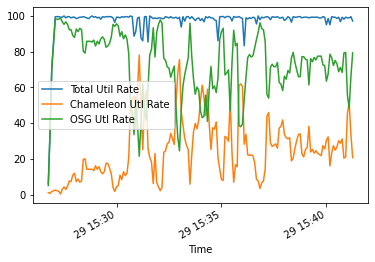

In [14]:
ru.plot()

In [15]:
ru.describe()

,Total Util Rate,Chameleon Utl Rate,OSG Utl Rate
count,173.000000,173.000000,173.000000
mean,97.391908,25.289855,72.674624
std,9.078005,16.490237,17.673666
min,6.200000,0.365000,5.110000
25%,98.600000,12.800000,63.500000
50%,99.300000,23.700000,75.400000
75%,99.600000,33.700000,86.500000
max,100.000000,78.100000,98.900000
